In [1]:
# Import Necessary Libiraries
import os
import numpy as np
import tensorflow as tf
import shutil
import glob
import random
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
'''device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))'''

SystemError: GPU device not found

### 2. Data Understanding

In [3]:
train_dir = 'drive/My Drive/PaymentReceipt/dataset/train'
test_dir = 'drive/My Drive/PaymentReceipt/dataset/test'
val_dir = 'drive/My Drive/PaymentReceipt/dataset/val'

In [4]:
os.listdir(train_dir)

['KPay', 'AYAPay', 'CBPay', 'WavePay', 'Other']

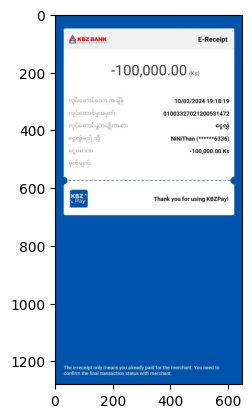

In [5]:
import cv2
import matplotlib.pyplot as plt

'''files = glob.glob(os.path.join(train_dir,'AYAPay') + '/*')[10]
image = cv2.imread(files)
#plt.imshow(image)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)'''

'''files = glob.glob(os.path.join(test_dir,'CBPay') + '/*')[10]
image = cv2.imread(files)
#plt.imshow(image)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)'''

files = glob.glob(os.path.join(val_dir,'KPay') + '/*')[10]
image = cv2.imread(files)
#plt.imshow(image)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)


### 3.Data Preprocessing

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen_train = ImageDataGenerator(rescale=1./255)
datagen_test = ImageDataGenerator(rescale=1./255)
datagen_val = ImageDataGenerator(rescale=1./255)


In [7]:
batch_size = 5
target_size = (300, 300)
train_set = datagen_train.flow_from_directory(train_dir,
                                              target_size=target_size,
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)
val_set = datagen_val.flow_from_directory(val_dir,
                                          target_size=target_size,
                                          batch_size=batch_size,
                                          class_mode='categorical',
                                          shuffle=False)
test_set = datagen_test.flow_from_directory(test_dir,
                                            target_size=target_size,
                                            batch_size=batch_size,
                                            class_mode='categorical',
                                            shuffle=False)

Found 318 images belonging to 5 classes.
Found 82 images belonging to 5 classes.
Found 102 images belonging to 5 classes.


### 4. Modeling

In [11]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(64,(3, 3), activation='relu', input_shape=(300, 300, 3)))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.Conv2D(64,(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.Conv2D(64,(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(500, activation='relu'))
model.add(tf.keras.layers.Dense(1000, activation='relu'))
model.add(tf.keras.layers.Dense(5, activation='softmax'))

In [12]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
history = model.fit(train_set,
                    batch_size=batch_size,
                    epochs=10,
                    validation_data=val_set,
                    verbose=2)

Epoch 1/10
64/64 - 169s - 3s/step - accuracy: 0.4151 - loss: 1.6085 - val_accuracy: 0.5854 - val_loss: 1.0621
Epoch 2/10
64/64 - 225s - 4s/step - accuracy: 0.6352 - loss: 1.0072 - val_accuracy: 0.6220 - val_loss: 1.0396
Epoch 3/10
64/64 - 168s - 3s/step - accuracy: 0.6950 - loss: 0.8281 - val_accuracy: 0.6341 - val_loss: 1.0444
Epoch 4/10
64/64 - 199s - 3s/step - accuracy: 0.6761 - loss: 0.9980 - val_accuracy: 0.7805 - val_loss: 0.6850
Epoch 5/10
64/64 - 203s - 3s/step - accuracy: 0.8648 - loss: 0.4432 - val_accuracy: 0.7439 - val_loss: 0.9221
Epoch 6/10
64/64 - 167s - 3s/step - accuracy: 0.9528 - loss: 0.1519 - val_accuracy: 0.7683 - val_loss: 1.1431
Epoch 7/10
64/64 - 201s - 3s/step - accuracy: 0.9623 - loss: 0.1267 - val_accuracy: 0.7805 - val_loss: 1.2778
Epoch 8/10
64/64 - 168s - 3s/step - accuracy: 0.8522 - loss: 0.6366 - val_accuracy: 0.6829 - val_loss: 1.6162
Epoch 9/10
64/64 - 165s - 3s/step - accuracy: 0.8962 - loss: 0.4060 - val_accuracy: 0.7073 - val_loss: 1.3530
Epoch 10/1

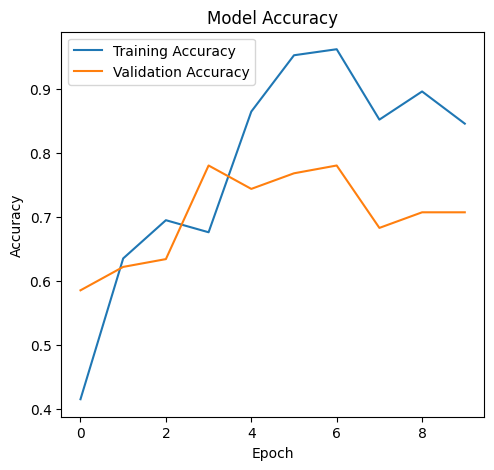

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plotting accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='best')

### 5. Evaluation

In [15]:
class_dict = test_set.class_indices
y_predicted = model.predict(test_set)
y_pred = []
for i in y_predicted:
  y_pred.append(np.argmax(i))

21/21 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step


In [16]:
y_test = test_set.classes.tolist()

In [17]:
class_dict

{'AYAPay': 0, 'CBPay': 1, 'KPay': 2, 'Other': 3, 'WavePay': 4}

In [18]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[10  1  1  4  3]
 [ 3 12  1  4  0]
 [ 0  0 26  3  0]
 [ 3  0  1  7  1]
 [ 1  0  3  2 16]]


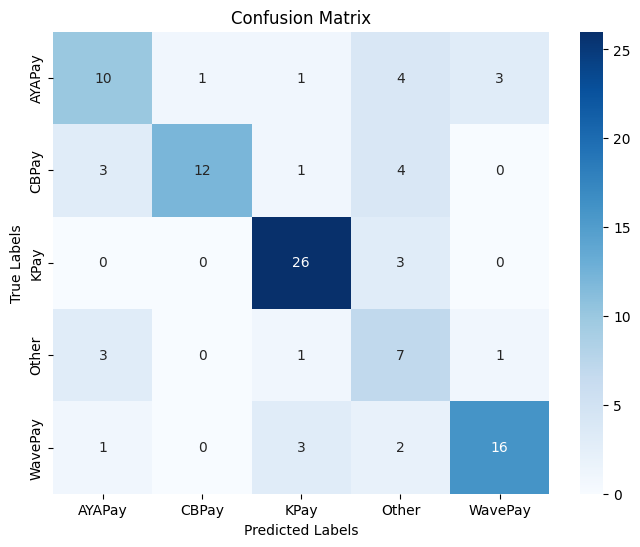

In [19]:
import seaborn as sns
# Define class labels (optional)
class_names = test_set.class_indices.keys()

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [20]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print("Accuracy Score: ",accuracy_score(y_test, y_pred)*100,'%')
print("Precision Score: ",precision_score(y_test, y_pred,average='macro')*100,'%')
print("Recall Score: ",recall_score(y_test, y_pred,average='macro')*100,'%')
print("F1 Score: ",f1_score(y_test, y_pred,average='macro')*100,'%')


Accuracy Score:  69.6078431372549 %
Precision Score:  69.47624434389141 %
Recall Score:  66.66947148435352 %
F1 Score:  66.69384122252976 %


In [ ]:
base_path = 'drive/My Drive/'
save_model = os.path.join(base_path, 'PaymentReceipt', 'model')
save_file = save_model + '/my_model.h5'

if not os.path.isdir(save_model):
       os.makedirs(save_model)

# Save the entire model to a HDF5 file
model.save(save_file)

In [ ]:
from keras.models import load_model
from keras.preprocessing.image import img_to_array, load_img
import numpy as np

# load and preprocess the image
def load_and_preprocess_image(image_path, target_size = (300, 300)):

    # Load the image
    image = load_img(image_path, target_size=target_size)
    # Convert the image to a numpy array
    image = img_to_array(image)
    # Expand dimensions to match the input shape of the model
    image = np.expand_dims(image, axis=0)
    # Normalize the image (if your model was trained on normalized data)
    image /= 255.0
    return image

predict = {}
class_labels = ['AYAPay', 'CBPay', 'KPay', 'Other', 'WavePay']
image_folder = os.path.join(base_path, 'PaymentReceipt', 'dataset/deploy test data')
test_images_path = glob.glob(image_folder + '/*',recursive=True)

if len(test_images_path) > 0:
  # Load the trained model
  loaded_model = load_model(save_file)

for img_path in test_images_path:
  dir, fileName = os.path.split(img_path)
  # Preprocess the image
  image = load_and_preprocess_image(img_path)

  # Make predictions
  predictions = loaded_model.predict(image)
  # Process the predictions
  predicted_class = np.argmax(predictions, axis=1)
  predicted_class = class_labels[predicted_class[0]]
  predict[fileName] = predicted_class
  print(fileName,':', predicted_class)


#### Hyperparameter Tunning

In [ ]:
'''import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

# Define a function to create the model
def create_model(activation='relu', optimizer='adam'):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(64,(3, 3), activation='relu', input_shape=(270, 270, 3)))
    model.add(tf.keras.layers.MaxPooling2D(2, 2))
    model.add(tf.keras.layers.Conv2D(64,(3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(2, 2))
    model.add(tf.keras.layers.Conv2D(64,(3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(2, 2))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(500, activation='relu'))
    model.add(tf.keras.layers.Dense(1000, activation='relu'))
    model.add(tf.keras.layers.Dense(5, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Wrap the model for use with scikit-learn
model = KerasClassifier(build_fn=create_model, verbose=0)

# Define the grid of hyperparameters
param_grid = {
    'activation': ['relu', 'tanh'],
    'optimizer': ['adam', 'sgd'],
    'batch_size': [5, 10, 16, 32],
    'epochs': [10, 15, 20],
}

# Create GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

# Fit the model (using the training set)
grid_result = grid.fit(train_set, validation_data=val_set)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))'''